# Computer Vision 

# Exercise 2: Basic Image Processing With OpenCV

- TU Chemnitz
    - Fak. für Informatik
        - Professur Künstliche Intelligenz
            - Lehre
                - Bildverstehen
     
Contact:
* julien dot vitay at informatik dot tu-chemnitz dot de
* abbas dot al-ali at informatik dot tu-chemnitz dot de

Course web page:
[https://www.tu-chemnitz.de/informatik/KI/edu/biver/](https://www.tu-chemnitz.de/informatik/KI/edu/biver/)

## Exercise 2: Basic Image Processing With OpenCV

## 1. OpenCV Computer Vision Library

<img src="img/opencv.jpg" alt="img/opencv.jpg" width="600"/>

- Originally developed by Intel, now maintained by a fundation (BSD license)

- The library is written in C++ but you can access it from Python:

```python
import cv2
```

- The official website of OpenCV is at [http://opencv.org](http://opencv.org)

- The official documentation of OpenCV( C++ and Python) is at <http://docs.opencv.org/3.1.0/>

- Python tutorials are at <https://docs.opencv.org/3.1.0/d6/d00/tutorial_py_root.html>

## 2. Basic IO

### 2.A. Loading An Image

The function `imread()` can be used to load an image from a file:

```python
img = cv2.imread('path/to/img.ext', FLAG)
```
- First argument is the path to the file
- Second argument( optional) could be:

    - `cv2.IMREAD_COLOR` (or 1): Loads a color image. Any transparency of image will be neglected. It is the default flag.
    - `cv2.IMREAD_GRAYSCALE` (or 0): Loads image in grayscale mode
    - `cv2.IMREAD_UNCHANGED` (or -1): Loads image as such including alpha channel
    - ...

- Images loaded by OpenCV are Numpy arrays

### 2.B Saving An Image

Saving a numpy array (2D or 3D) as an image to the disk can be done using `imwrite`:

```python
cv2.imwrite('path/to/img.ext', img)
```

Most image extensions can be used: jpg, png, bmp...

### 2.C. Displaying An Image

- The simplest is to use matplotlib:

```python
plt.imshow(img [, options] )
plt.show()
```

- OpenCV has an `imshow` function, but it is not practical.

- If you want to display a color image, you have to convert it to RGB (more on that later):

```python
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)
plt.show()
```

**Now:**

- Read the image file `lena.jpg` from the disk to the two variables
    + `img_color` as a colored and
    + `img_gray` as a gray-scaled image
    
- Of the two variables tell:
    + the type of the variable
    + the shape of the NumPy array
    + the data type of the elemets in the array
    + the minimum and maximum value

- Save the colored image to the disk in `lena-colored.jpg`
- Save the grayscale image to the disk in `lena-gray.jpg`

In [1]:
#%matplotlib inline 
from __future__ import print_function

#import matplotlib
#matplotlib.use('TKAgg')
import matplotlib.pyplot as plt

import numpy as np
import cv2

# In color
img_color = cv2.imread('lena.jpg')

# In grayscale
img_gray = cv2.imread('lena.jpg', 0)

print(type(img_color))
print(img_color.shape)
print(img_color.dtype)
print(img_color.min())
print(img_color.max())

print(type(img_gray))
print(img_gray.shape)
print(img_gray.dtype)
print(img_gray.min())
print(img_gray.max())

cv2.imwrite('lena-colored.jpg', img_color)
cv2.imwrite('lena-gray.jpg'   , img_gray )

<class 'numpy.ndarray'>
(256, 256, 3)
uint8
0
255
<class 'numpy.ndarray'>
(256, 256)
uint8
16
247


True

## 3. Creating Images From Numpy Arrays

- Numpy arrays of shape (height, width) or (height, width, 3) and dtype `np.uint8` can be saved as images

- If the array has another dtype, the values will be casted to `np.uint8`

### 3.A. Creating A Grayscale Image

Create a grayscale image of size 640x480, with a black background and a white 100x100 square in the center

In [11]:
img_black = np.zeros((480,640), dtype=np.uint8)
img_white_square = img_black.copy()

img_white_square[480/2-50:480/2+50,640/2-50:640/2+50] = 255

cv2.imwrite('black.jpg',img_black)
cv2.imwrite('white-square.jpg',img_white_square)

TypeError: slice indices must be integers or None or have an __index__ method

### 3.B. Creating A Color Image

- Create a color image of size 640x480, with a white background and a red 100x100 square in the center

- Create a color image of size 640x480, with random pixels

**Beware:** the order of the colors in the third dimension when writing is BGR, not RGB.

In [2]:
img_white = np.zeros((480,640,3), dtype=np.uint8)+255
img_red_square = img_white.copy()

img_red_square[480/2-50:480/2+50,640/2-50:640/2+50,[1,2]] = 0
img_noise = np.random.randint(0,256,(480,640,3),dtype=np.uint8)

cv2.imwrite('white.jpg', 
    cv2.cvtColor(img_white, cv2.COLOR_RGB2BGR))
cv2.imwrite('red_square.jpg',
    cv2.cvtColor(img_red_square, cv2.COLOR_RGB2BGR))
cv2.imwrite('noise.jpg',
    cv2.cvtColor(img_noise, cv2.COLOR_RGB2BGR))   

TypeError: slice indices must be integers or None or have an __index__ method

## 4. Color Spaces

Converting between color spaces

- The default colorspace in OpenCV is BGR.

- You can convert images from and to many color spaces with `cvtColor`, e.g.:

```python
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
```

- You can get a list of all possible color conversions by typing:

```python 
for flag in dir(cv2):
    if flag.startswith('COLOR_'):
        print(flag)
```

In [12]:
for flag in dir(cv2):
    if flag.startswith('COLOR_'):
        print(flag)

COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BG2GRAY
COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA
COLOR_BAYER_BG2RGB_EA
COLOR_BAYER_BG2RGB_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB
COLOR_BAYER_GB2RGBA
COLOR_BAYER_GB2RGB_EA
COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY
COLOR_BAYER_GR2RGB
COLOR_BAYER_GR2RGBA
COLOR_BAYER_GR2RGB_EA
COLOR_BAYER_GR2RGB_VNG
COLOR_BAYER_RG2BGR
COLOR_BAYER_RG2BGRA
COLOR_BAYER_RG2BGR_EA
COLOR_BAYER_RG2BGR_VNG
COLOR_BAYER_RG2GRAY
COLOR_BAYER_RG2RGB
COLOR_BAYER_RG2RGBA
COLOR_BAYER_RG2RGB_EA
COLOR_BAYER_RG2RGB_VNG
COLOR_BGR2BGR555
COLOR_BGR2BGR565
COLOR_BGR2BGRA
COLOR_BGR2GRAY
COLOR_BGR2HLS
COLOR_BGR2HLS_FULL
COLOR_BGR2HSV
COLOR_BGR2HSV_FULL
COLOR_BGR2LAB
COLOR_BGR2LUV
COLOR_BGR2Lab
COLOR_BGR2Luv
COLOR_BGR2RGB
COLOR_BGR2RGBA
COLOR_BGR2XYZ
COLOR_BGR2YCR_CB
CO

- Convert the lena image to HSV (hue-saturation-value) and save the saturation as a grayscale image
- Saturate the image by setting the S channel to 255 and save it as a color image

In [13]:
lena_bgr = cv2.imread('lena.jpg',cv2.IMREAD_COLOR)
lena_hsv = cv2.cvtColor(lena_bgr, cv2.COLOR_BGR2HSV)
cv2.imwrite('lena-saturation.jpg',lena_hsv[:,:,1])

lena_saturated = lena_hsv.copy()
lena_saturated[:,:,1] = 255
lena_saturated = cv2.cvtColor(lena_saturated, cv2.COLOR_HSV2BGR)
cv2.imwrite('lena-saturated.jpg',lena_saturated)

True

## 5. Point Operation: Thresholding

- The thresholding operation is to create a *destination* image $g$ from a *source* image $f$ by replacing each pixel of the original image $f$ with 255 if the pixel intensity is above a threshold $T$, and by 0 otherwise.

$$
    g(i, j) = \begin{cases}
                255 \quad \text{ if } f(i, j) > T \\
                0   \quad \text{ otherwise.}
            \end{cases}
$$

- Apply a threshold $T=127$ on the grayscale image of Lena `img_gray` and save the result to `lena-thresholded.jpg`. You can either:
    + Iterate over the two coordinates and set the pixel intensity of the target image/array:

    ```python
    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            thresholded[i, j] = ...
    ```
    
    + Or you use boolean arrays for sub-indexing:

    ```python
    thresholded[img_gray > T] = ...
    ```

In [14]:
# Threshold the lena image
T = 127
thresholded = np.zeros(img_gray.shape, dtype=np.uint8)
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        if img_gray[i, j] > T:
            thresholded[i, j] = 255
cv2.imwrite('lena-thresholded.jpg', thresholded)

# or :
thresholded = img_gray.copy()
thresholded[thresholded > T] = 255
thresholded[thresholded <= T] = 0
cv2.imwrite('lena-thresholded2.jpg', thresholded)

True

- Modify the thresholding procedure so that above-threshold pixels are converted to red, not white

In [15]:
# Make the lena image reddish 
red_lena = np.zeros(img_color.shape, dtype=np.uint8)
red_lena[:, :, 0] = thresholded
cv2.imwrite('lena-red.jpg', cv2.cvtColor(red_lena, cv2.COLOR_RGB2BGR))

True

- Another solution to threshold an image is to use the OpenCV function `threshold`:

```python
ret, th = cv2.threshold(img_gray,thresh=127, 
                        maxval=255, type=cv2.THRESH_BINARY)
```

- There are many threshold types to investigate:

![img/threshold.jpg](img/threshold.jpg)

In [5]:
# Threshold the lena image using cv2.threshold()
ret, thresholded = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite('lena-thresholded3.jpg', thresholded)

True

- Apply thresholding on the `sudoku.jpg` image. Try to find a threshold that works to extract all printed text.

In [6]:
# Threshold the sudoku image
sudoku_gray = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)
ret, thresholded = cv2.threshold(sudoku_gray, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite('sudoku-thresholded.jpg', thresholded)

True

- Does it work well? Why is it difficult to find a suitable threshold value?

- Now: apply the adaptive thresholding on the `sudoku.jpg` image

In [7]:
# Adaptive threshold for the sudoku image
sudoku_gray = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)
thresholded2 = cv2.adaptiveThreshold(sudoku_gray, 255
            , cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
cv2.imwrite('sudoku-thresholded2.jpg', thresholded2)

True

## 6. Global Operation: Histogram Equalization

- Build and plot an histogram $h(I)$ of pixel intensities in the grayscale lena

- Build and plot the corresponding cumulative histogram $c(I)$
 
$$ c(I) = \frac{1}{N} \sum_{i=0}^I h(i) = c(I-1) + \frac{1}{N} h(I) $$

<table>
<tr>
<td>
<img src="img/lena-histo.png" alt="img/lena-histo.png\" width="300"/>
</td>
<td>
<img src="img/lena-cumhisto.png" alt="img/lena-cumhisto.png" width="300"/>
</td>
</tr>
</table>

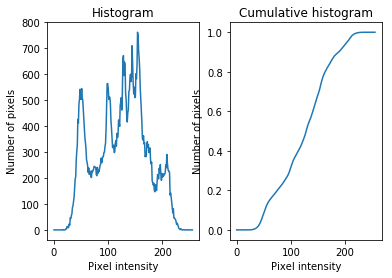

In [8]:
# Make a histogram of pixel intensities
hist = np.zeros(256)
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        hist[img_gray[i, j]] += 1

# Compute the cumulative histogram
cum_hist = np.zeros(256)
N = img_gray.size
cum_hist[0] = hist[0]/N
for p in range(1,256):
    cum_hist[p] = cum_hist[p-1] + hist[p]/N

plt.subplot(121)    
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')

# or directly:
# plt.subplot(121)    
# plt.hist(img_gray.flatten(), 256, [0,256])

plt.subplot(122)    
plt.plot(cum_hist)
plt.title('Cumulative histogram')
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')

plt.show()

- Equalize the grayscale lena and save it to disk. Compare.

$$ g(i, j) = 255 \times c(f(i, j)) $$

In [9]:
# Equalize the histogram
equalized = np.zeros(img_gray.shape, dtype=np.uint8)
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        equalized[i, j] = 255 * cum_hist[img_gray[i][j]]

cv2.imwrite('lena-equalized.jpg', equalized)    

True

- OpenCV has a `equalizeHist(img_gray)` method that does the same operation. Compare its result with yours


In [10]:
# using OpenCV:
equalized = cv2.equalizeHist(img_gray)
cv2.imwrite('lena-equalized2.jpg', equalized) 

True

## 7. Local Operation: Locally Adaptive Histogram Equalization

- The problem with histogram equalization is that it uses **global** information about the image

- **Locally adaptive histogram equalization** (CLAHE) performs histogram equalization **locally** around each pixel.

<img src="img/clahe.png" alt="img/clahe.png" width="300"/>
<!-- ![](img/clahe.png) -->

$$ c(f(i, j)) = d_1(i, j) c_1(f(i, j)) + d_2(i, j) c_2(f(i, j)) + d_3(i, j) c_3(f(i, j)) + d_4(i, j) c_4(f(i, j)) $$

- OpenCV allows to apply directly this algorithm on an image:

```python
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(img)
```

- Apply the CLAHE algorihm on the images lena and sudoku

In [16]:
# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_lena = clahe.apply(img_gray)
cv2.imwrite('lena-clahe.jpg', clahe_lena)

clahe_sudoku = clahe.apply(sudoku_gray)
cv2.imwrite('sudoku-clahe.jpg', clahe_sudoku)  

True

## 8. Color Filters

We want to filter out the feathers on Lena's hat. Their color has a hue between 120 and 160.

- Create a color image where only the feathers are colored as in the original, the rest being gray.

The algorithm is basically:

1. Convert the color image to HSV.

2. Convert the gray image to BGR to store the result.

3. For all pixels:

    + If the hue is between 120 and 160, write the original BGR color vector to the result image.   

- As a first try, make a double for-loop over the pixels

In [17]:
hsv  = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

result = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

hue_min = 120
hue_max = 160

for i in range(img_color.shape[0]):
    for j in range(img_color.shape[1]):
        if hsv[i,j,0]> hue_min and  hsv[i,j,0]< hue_max:
            result[i,j,:] = img_color[i,j,:]

- As a second try, try to think about what this function does:

```python
hue = hsv[:, :, 0]
np.bitwise_and(hue > 120, hue < 160)
```


In [18]:
hsv  = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

result = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

pixels = np.bitwise_and( hsv[:,:,0]> hue_min, hsv[:,:,0]< hue_max)
result[pixels,:] = img_color[pixels, :]

When you are done, put your code into a function, we will need it later:

```python
def hue_filter(img, hue_min, hue_max):
    ...
```

In [19]:
# Filter the violet color
def hue_filter(img_color, hue_min, hue_max):
    hsv  = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    result = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)    

    """
    for i in range(img_color.shape[0]):
        for j in range(img_color.shape[1]):
            if hsv[i,j,0]> hue_min and  hsv[i,j,0]< hue_max:
                result[i,j,:] = img_color[i,j,:]
    """
    
    pixels = np.bitwise_and( hsv[:,:,0]> hue_min, hsv[:,:,0]< hue_max)
    result[pixels,:] = img_color[pixels, :]
        
    return result

violet_filtered = hue_filter(img_color, 120, 160)
cv2.imwrite('lena-violet-filtered.jpg', violet_filtered)

True

## 9. Videos

### 9.A. Opening A Video

You can read a video frame-by-frame with the following code:

```python
import cv2

cap = cv2.VideoCapture('video.ogv')

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        #frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', frame)
    else:
        break
    k = cv2.waitKey(5) & 0xFF # Sleep 5 ms
    if k == 27: # Press ESC to close
        break

cap.release()
cv2.destroyAllWindows()
```

- Put the code in a script `vread.py` and run it from a terminal

```bash
$ python vread.py
```

- Open the script again and remove the comment mark `#` in the `if` statement in odrer to call the function `frame = cv2.cvtColor()`


- You can read different video format supported by ffmpeg/gstreamer on Linux:

    * H264 (.mp4)
    * WebM (.webm)
    * AVI (.avi)
    * Theora (.ogv)
    * DivX, WMV...

- In the B202, you have only access to `.ogv` videos (non-free codecs issues)

### 9.B. Writing A Video

Saving a video is just as easy. Copy the code to a script `vwrite.py` and run it:


```python
# vwrite.py: writing a video

import cv2
import numpy as np

# create VideoWriter object
out = cv2.VideoWriter( 
    filename='video-square.ogv', 
    fourcc=cv2.VideoWriter_fourcc(*'THEO'), 
    fps=30.0, 
    frameSize=(560,320)
)


for f in range(90):
    frame = np.zeros((320,560), np.uint8)
    frame[160 - 50 + 2*f: 160 + 50 + 2*f, 
         280 - 50 + 2*f: 280 + 50 + 2*f] = 255
    out.write(cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR))

out.release()
```

- You only need to choose the right codec for the `fourcc` argument.

    + `'H264'` for mp4.
    + `'XVID'` for avi.
    + `'THEO'` for theora. 

- **Only Theora works in B202**
- See <http://www.fourcc.org>.

## 10. Exercises

### 10.A. Processing Videos

- Read the given video `video.ogv` and save the grayscale version in `video-gray.ogv`.

- Apply a color filter on each frame and filter the blue color (hue between 100 and 130).

- Compare the time needed for this last conversion when using the double for-loops, and the `numpy.bitwise_and` method.
